In [ ]:
import numpy as np 
import pandas as pd 
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

##### spacy stopwords list are larger compared to NLTK

In [ ]:
import nltk
from nltk import word_tokenize
import keras
import spacy
spacy_nlp = spacy.load('en_core_web_lg')

# Load Files

In [ ]:
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sub=pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

# Cleaning

In [ ]:
def conv_str(df):
    if isinstance(df,pd.DataFrame):
        df['text']=df['text'].astype(str)
        return df
    else:
        raise TypeError("Expected type pd.DataFrame")
def normalize(text):
    if text is not None:
        return text.lower()
    else:
        raise TypeError("Expected type str")
def stop_words_removal(df):
        for i in range(len(test)):
            df['text'].iloc[i]=remove_stopwords(df['text'].iloc[i])
        return df ['text']
def remove_stopwords(sentence):
            import nltk
            from nltk import word_tokenize
            stop_words = stopwords = spacy.lang.en.stop_words.STOP_WORDS   
            word_tokens = word_tokenize(sentence) 
            filtered_sentence =' '.join(map(str,[w for w in word_tokens if not w in stop_words]))
            return filtered_sentence
def emoji_removal(df):
        for i in range(len(test)):
            df['text'].iloc[i]=remove_emoji(df['text'].iloc[i])
        return df ['text']
def remove_emoji(text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  #Emoji representations
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
def remove_characteristic(text):
    twt=re.compile('^rt\s?:$ |@+|#+') # rt : appeared in texts
    return twt.sub(r'',text)
def remove_html(text):
    html=re.compile(r'<.*?>|<!--.*?-->') #Some morons might add comments within tags
    return html.sub(r'',text)
def remove_url(text):
        url = re.compile(r'http[s]\S+|www\.\S+') #This extremely incomprehensible regex is to prevent http : 
        return url.sub(r'',text)
def remove_extra_space(text):
    exs=re.compile(r' {2,}')
    return exs.sub(r'',text) 
def remove_other(text):
    regex=re.compile(r'[^a-z ]')
    return regex.sub(r'',text)

In [ ]:
"""class NLP():
    def __init__(self,train,test,sample_submission):
        self.train=pd.read_csv(train)
        self.test=pd.read_csv(test)
        self.sample_submission=pd.read_csv(sample_submission)
    def display(self,*args):
        print(self.train.head(args[0]),self.test.head(args[1]),self.sample_submission.head(args[2]),sep='\n')
        nlp=NLP('/kaggle/input/nlp-getting-started/train.csv','/kaggle/input/nlp-getting-started/test.csv','/kaggle/input/nlp-getting-started/sample_submission.csv')"""

In [ ]:
def tokenize(dataframe,char_level=False):
    if  isinstance(dataframe,pd.DataFrame) or isinstance(dataframe,pd.Series):
        data=np.array(dataframe.values).ravel()
        if char_level is not type(bool):
                from keras.preprocessing.text import Tokenizer
                if char_level==False:
                    tk=Tokenizer(lower=True ,char_level=False)
                    tk.fit_on_texts(data)
                    text_sequences=tk.texts_to_sequences(data)
                else:
                    tk=Tokenizer(lower=True ,char_level=True)
                    tk.fit_on_texts(data)
                    text_sequences=tk.texts_to_sequences(data)  
                return text_sequences,tk
        else:
            TypeError("Expected type bool got type {0}".format(type(topx)))
    else:
        raise TypeError("Expected type pd.DataFrame got type {0}".format(type(dataframe)))
        

        
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    from keras.preprocessing.sequence import pad_sequences
    return pad_sequences(x, maxlen=length, padding='post',value=0.0) #Pad at the end


def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)
    
    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

def words_distribution(dataframe,topx=10,stopwords=False,stopwordslist=None):
    """
    Parameters
    ----------
    dataframe : pd.Dataframe
        The dataframe containing text.
    topx : int, optional
        Display the top n words in the given distribution. The default is 10.
    stopwords : bool, optional
        Stopwords in various lagnuages. The default is False.
    stopwordslist : TYPE, optional
        DESCRIPTION. The default is None.

    Raises
    ------
    TypeError
        When wrong type of iterable is entered in the given fucntion

    Returns
    -------
    None.
    """
    
    if  dataframe is not None:
        if topx is not type(int):
            from nltk import FreqDist
            from nltk import word_tokenize
            sens=[sen[0] for sen in dataframe.values if sen!=']' or sen!='[']
            sens=[''.join(sen[0].lower()) for sen in dataframe.values if sen!=']' or sen!='[']
            words=word_tokenize(str([sens[i] for i in range(len(sens))]))
            freq=FreqDist(words)
            freq.plot(topx)
        else:
                 raise TypeError("Expected type int got type {0}".format(type(topx)))
                
    else:
        raise TypeError("Expected type pd.DataFrame got type {0}".format(type(dataframe)))

## Distribution of Data before Cleaning 

In [ ]:
words_distribution(train['text'],10)

* Get ready for some cleaning ~~!

In [ ]:
train=conv_str(train)
train['text']=normalize(train['text'].str)
train['text']=train['text'].apply(lambda x: remove_url(x))
train['text']=train['text'].apply(lambda x: remove_html(x))
train['text']=train['text'].apply(lambda x : remove_emoji(x))
train['text']=train['text'].apply(lambda x : remove_stopwords(x))
train['text']=train['text'].apply(lambda x:remove_other(x))
train['text']=train['text'].apply(lambda x:remove_characteristic(x))
train['text']=train['text'].apply(lambda x : remove_extra_space(x))


test=conv_str(test)
test['text']=normalize(test['text'].str)
test['text']=test['text'].apply(lambda x: remove_url(x))
test['text']=test['text'].apply(lambda x: remove_html(x))
test['text']=test['text'].apply(lambda x : remove_emoji(x))
test['text']=test['text'].apply(lambda x : remove_stopwords(x))
test['text']=test['text'].apply(lambda x:remove_other(x))
test['text']=test['text'].apply(lambda x:remove_characteristic(x))
test['text']=test['text'].apply(lambda x : remove_extra_space(x))

## Distribution of Data After Cleaning 

In [ ]:
test['text'].head(20)

In [ ]:
#remove_url('The link to this post is http://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python')

In [ ]:
def remove_space(text):
    regex=re.compile(r'%\S?20')
    return regex.sub(r' ',text)

In [ ]:
def append_location(x):
    return ' '.join(train['location'].iloc[train.index[x]]+x)

I try to append location names with text to add meaning  (However this does not work very well)

In [ ]:
train['keyword'].fillna(value="None",inplace=True)
train['keyword']=train['keyword'].apply(lambda x :remove_space(x))
#train['text']=train['keyword']+'is location'+train['text']
train_id=train['id']
train.drop(columns=['id','keyword','location'],axis=1,inplace=True)
train['target']='__label__'+''+train['target'].astype(str)

test['keyword'].fillna(value="None",inplace=True)
test['keyword']=test['keyword'].apply(lambda x :remove_space(x))
#test['text']=test['keyword']+'is location '+test['text']
test_id=test['id']
test.drop(columns=['keyword','location'],axis=1,inplace=True)

In [ ]:
train['target']=train['target'].str.replace('1','disaster')
train['target']=train['target'].str.replace('0','nodisaster')


In [ ]:
#train['text']=train.text.str.encode('utf-8')
#train['target']=train.target.str.encode('utf-8')
train=train[['target','text']]

In [ ]:
train.shape,test.shape

# fasText model

So why fastText you may ask? Well, for starters it is fast and.
- Provides enriched sub-word information which models such as Word2Vec may lack
- Out of corpus words representations can be easily learned!
- NOTE : fasText is NOT Windows compatible so beware.
- It is CPU based model.
- In order to tune hyperparameters pls read the paper:
[Bag of Tricks for Efficient Text Classification](https://arxiv.org/abs/1607.01759) by the same person who made Word2Vec *Mikolov yeah*

## Vizualization explaining fasText
(Not mine credit to respective owner/s)

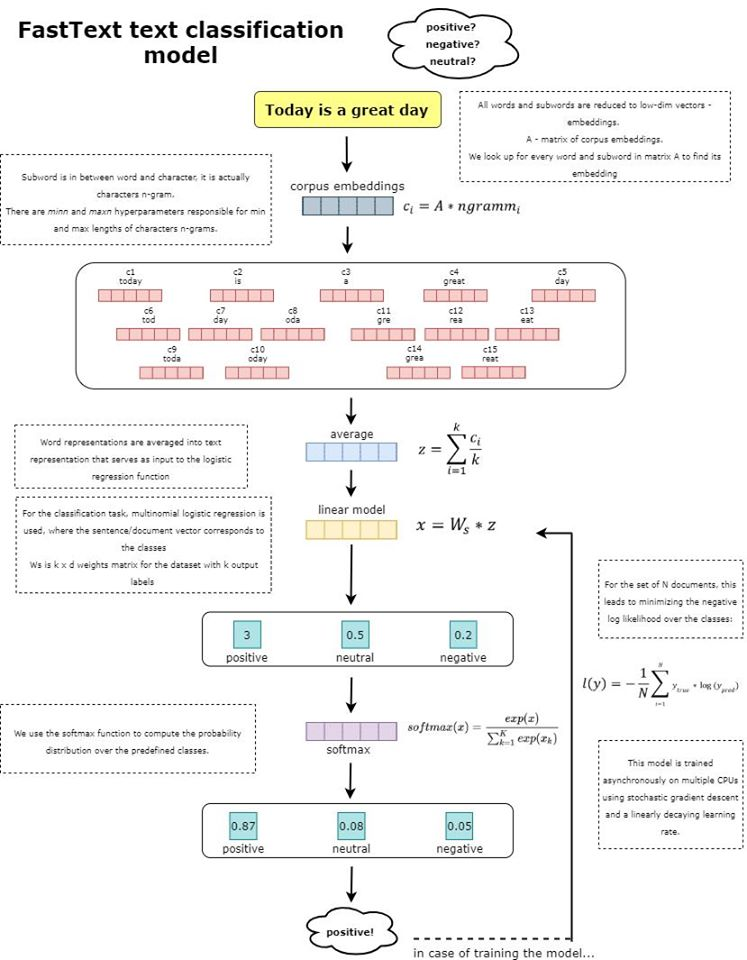

Splitting with random shuffling makes fastText training worse

In [ ]:
"""from sklearn.model_selection import train_test_split
fft_train,fft_test=train_test_split(train,test_size=0.3,random_state=42)
fft_train.to_csv(r'fft_train.txt', index=False, sep=' ', header=False)
fft_test.to_csv(r'fft_test.txt', index=False, sep=' ', header=False)"""

In [ ]:
train.to_csv(r'train.txt', index=False, sep=' ',header=False)
test.to_csv(r'test.txt', index=False, sep=' ',header=False)

- I would suggest to use locally and clone the latest repo from Github ,which has features like automatic hyperparamater optimization

In [ ]:
n = (train.shape[0] * 7)/10
n = int(round(n))

# Split the file into 70% train and 30% test
fft_train = train[:n] 
fft_test = train[n:] 
print(fft_train.shape, fft_test.shape)
fft_train.to_csv(r'fft_train.txt', index=False, sep=' ', header=False)
fft_test.to_csv(r'fft_test.txt', index=False, sep=' ', header=False)

In [ ]:
np=fft_train['text'].values
length=[]
for i in np:
    length.append(len(i))
from statistics import mean
print('Mean no. of words',mean(length))

In [ ]:
import fasttext
import fasttext.util

## Understanding the hyperparameters:
- **label_prefix **:The librarrty assumes a prefix to be added to classification labels
- **lr**: The learning rate...
- **neg **: Number of negative samples 2<neg<6
- **epoch **: 5,10,15 works well incase of default (0.1) lr.
- **dim **: 128,256 perform very well.
- **loss**:softmax takes a bit longer ,hs  hierarchial softmax is good too,  ns not good score.
- **word_ngrams**: 2=bigrams ,3=trigrams ,in this case limit it to 2 as per original paper + score_performance
- **ws**: Size of **context window** ,here avg sentence length is not too large ,therefore we chose 3 based on experiments. 
- **bucket**: Hash length

In [ ]:
ftmodel = fasttext.train_supervised(input='/kaggle/working/train.txt',label_prefix="__label__",neg=5,epoch=10,dim=300,loss='hs',word_ngrams=2,ws=4,minn=2,maxn=6,pretrainedVectors='/kaggle/input/wikinews300d1mvec/wiki-news-300d-1M.vec')

In [ ]:
#unsupervised_model = fasttext.train_supervised(input='/kaggle/working/fft_train.txt',label_prefix="__label__",lr=0.05,neg=2,epoch=200,dim=256,loss='softmax',word_ngrams=2,minn=2,maxn=6)

In [ ]:
#ftmodel.get_output_matrix()[0].shape

In [ ]:
#ftmodel = fasttext.train_supervised(input='/kaggle/working/train.txt',label_prefix="__label__",neg=5,epoch=400,dim=300,loss='hs')

In [ ]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

ftmodel.test('/kaggle/working/train.txt')

In [ ]:
df_submit = test[['id','text']]
#df_submit[df_submit['text'].str.isspace()==True]
#df_submit.at[13 ,'text']='none'

In [ ]:
ftmodel.predict('today is a good day')[0][0]

In [ ]:
embedding_matrix=ftmodel.get_output_matrix()[0]
#embedding_matrix.shape

In [ ]:
#preproc_train_sentences, preproc_test_sentences, train_tokenizer, test_tokenizer =preprocess(fft_train['text'],fft_test['text'])


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


tokenizer = Tokenizer()
tokenizer.fit_on_texts(fft_train['text'].values)
trainsequences = tokenizer.texts_to_sequences(fft_train['text'].values)
tword_index = tokenizer.word_index
print('Found %s unique tokens.' % len(tword_index))
traindata = pad_sequences(trainsequences,maxlen=31)
train['target']=train['target'].str.replace('__label__nodisaster','0')
train['target']=train['target'].str.replace('__label__disaster','1')
trainlabels=train['target'].iloc[:n]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(fft_test['text'].values)
testsequences = tokenizer.texts_to_sequences(fft_test['text'].values)
tesword_index = tokenizer.word_index
print('Found %s unique tokens.' % len(tesword_index))
testdata = pad_sequences(testsequences, maxlen=31)
testlabels=train['target'].iloc[n:]


In [ ]:
"""indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]"""

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM ,Conv1D ,MaxPooling1D ,GlobalMaxPooling1D ,Dropout ,GlobalAveragePooling1D ,AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np
w= np.zeros((len(tword_index) + 1, 300))

for word, i in tword_index.items():
    embedding_vector = ftmodel.get_word_vector(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        w[i] = embedding_vector

# Loading GloVe

In [ ]:
embeddings_index = {}
f = open(os.path.join('/kaggle/input/glove-global-vectors-for-word-representation/', 'glove.6B.200d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
wg= np.zeros((len(tword_index) + 1, 200))

for word, i in tword_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        wg[i] = embedding_vector

In [ ]:
# Preparing 

In [ ]:
import tensorflow
#from tensorflow import keras
from tensorflow import keras
from keras import Model,Input
from tensorflow.keras import optimizers ,layers,Model ,Input
from tensorflow.keras.layers import Bidirectional ,Dense,Dropout,GRU, GaussianNoise ,BatchNormalization,TimeDistributed ,Bidirectional,LSTM,Conv1D,BatchNormalization,GlobalMaxPooling1D,Embedding,concatenate

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
    #Embeddings
    inputs=Input(shape=(31,), name="INPUT")
    ft_embedding=Embedding(len(tword_index)+1,w.shape[1],weights=[w],input_length=31,trainable=False)(inputs)
    x1=Conv1D(filters=200,kernel_size=2, activation='relu', padding='valid')(ft_embedding)
    x1=BatchNormalization()(x1)
    x1=GlobalMaxPooling1D()(x1)


    #x2=LSTM(200,)(ft_embedding)
    #ftconcat=concatenate(inputs=[x1,x2])


    gve_embedding=Embedding(len(tword_index)+1,wg.shape[1],weights=[wg],input_length=31,trainable=False)(inputs)
    y1=Conv1D(filters=200,kernel_size=2, activation='relu', padding='valid')(gve_embedding)
    y1=BatchNormalization()(y1)
    y1=GlobalMaxPooling1D()(y1)

    #y2=LSTM(200,)(gve_embedding)
    #gveconcat=concatenate(inputs=[y1,y2])

    finalconcat=concatenate(inputs=[x1,y1])
    finalconcat=BatchNormalization()(finalconcat)
    finalconcat=Dense(128,activation='relu')(finalconcat)
    finalconcat=Dropout(0.4)(finalconcat)
    finalconcat=BatchNormalization()(finalconcat)
    finalconcat=Dense(1,activation='sigmoid')(finalconcat)
    model=Model(inputs=[inputs],outputs=finalconcat)
    model.compile(loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])
    model.summary()

In [ ]:
keras.utils.plot_model(model)

In [ ]:
#trainlabels=trainlabels.values
#trainlabels=trainlabels.astype('int32')
#testlabels=testlabels.values
#testlabels=testlabels.astype('int32')


In [ ]:
t=to_categorical(testlabels)

In [ ]:
t1=to_categorical(trainlabels)

In [ ]:
trainlabels.values.shape

In [ ]:
model.fit(traindata, trainlabels.values,validation_data=(testdata,testlabels.values), epochs=1, batch_size=64)

In [ ]:
"""model = Sequential()
model.add(Embedding(len(tword_index)+1,w.shape[1],weights=[w],input_length=31,trainable=False),)
#model.add(GaussianNoise(0.9))
#model.add(Conv1D(300, 2, activation='relu', padding='same'))
model.add(BatchNormalization())
#model.add(AveragePooling1D())
#model.add(Conv1D(200, 3, activation='relu', padding='same'))
#model.add(AveragePooling1D())
#model.add(BatchNormalization())
#model.add(GaussianNoise(-.4))
#model.add(Conv1D(256, 7, activation='relu', padding='same'))
#model.add(MaxPooling1D())
#model.add(Conv1D(100, 4, activation='relu', padding='same'))
#model.add(Conv1D(64, 4, activation='relu', padding='same'))
model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Bidirectional(LSTM(128,activation='relu')))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'),)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())"""


In [ ]:
#model.fit(traindata, trainlabels, validation_data=(testdata, testlabels), epochs=200, batch_size=128)

# Submission

In [ ]:
df_submit = test[['id','text']]
targets=[]
for row in df_submit['text']:
    pred_label=ftmodel.predict(row, k=-1)[0][0]
    if (pred_label == '__label__nodisaster'):
          pred_label = 0
    else:
          pred_label = 1
    targets.append(pred_label)     

# you add the list to the dataframe, then save the datframe to new csv
df_submit['target']=targets
df_submit=df_submit.drop(['text'],axis=1)
df_submit.to_csv('submission.csv',sep=',',index=False)